In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("World_Wide_Covid_19_dataset.csv")     # Loading datasets
df1=pd.read_csv("World_Wide_Covid19_Age.csv")

In [4]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [5]:
df.info()         # Checking Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [6]:
df.dtypes         # Checking Datatypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [7]:
df.shape         # Checking shape

(6603, 9)

In [8]:
df.isnull().sum()    # Checking Null values

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [9]:
df['Date']=pd.to_datetime(df['Date'])       # Converting date object to datetime format

In [10]:
df_dates=pd.DataFrame()                     # Extracting month,year,day from Date
df_dates["month"]=df["Date"].dt.month_name()
df_dates["year"]=df["Date"].dt.year
df_dates["day"]=df['Date'].dt.day_name()
df_dates

,month,year,day
0,April,2020,Saturday
1,April,2020,Saturday
2,April,2020,Saturday
3,April,2020,Saturday
4,April,2020,Saturday
...,...,...,...
6598,May,2020,Monday
6599,May,2020,Monday
6600,May,2020,Monday
6601,May,2020,Monday


In [11]:
df_dates['year'].nunique()    # year has only one unique value

1

In [12]:
df_dates['month'].nunique()   # year has only two unique value

2

In [13]:
df_dates['day'].nunique()    # year has only 7 unique value

7

In [14]:
df_dates.drop('year',axis=1,inplace=True)      # dropping year

In [15]:
df['Date']=df_dates['day']

In [16]:
#data=pd.concat([df,df_dates],sort=False)
#print(df.shape,df_dates.shape,data.shape)

In [17]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,Saturday,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,Saturday,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,Saturday,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,Saturday,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,Saturday,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [18]:
df.isnull().sum()      # Checking Null Values

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [19]:
# Imputing Null values with mean
df['Total Tests'].fillna(df['Total Tests'].mean(),inplace=True)
df['Total Cases'].fillna(df['Total Cases'].mean(),inplace=True)
df['Total Deaths'].fillna(df['Total Deaths'].mean(),inplace=True)
df['Total Recovered'].fillna(df['Total Recovered'].mean(),inplace=True)
df['Serious or Critical'].fillna(df['Serious or Critical'].mean(),inplace=True)
df['Active Cases'].fillna(df['Active Cases'].mean(),inplace=True)

In [20]:
df.isnull().sum()   # Checking Null values

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

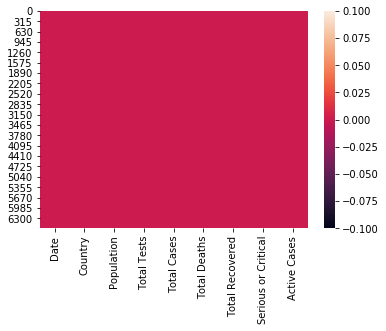

In [21]:
import seaborn as sns            # Checking Null values by heatmap
sns.heatmap(df.isnull())

In [22]:
df1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [23]:
df1['Fraction age 0-14 years'].fillna(df1['Fraction age 0-14 years'].mean(),inplace=True)

In [24]:
df1['Fraction age 15-64 years'].fillna(df1['Fraction age 15-64 years'].mean(),inplace=True)

In [25]:
df1['Fraction age 65+ years'].fillna(df1['Fraction age 65+ years'].mean(),inplace=True)

In [26]:
df1.isnull().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [27]:
df.describe()             # Checking Statistical Description

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,6.934856e+05,8.828521e+04,5990.992214,22955.519135,1309.473245,6.511732e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01
50%,6.859926e+06,5.419500e+04,6.320000e+02,55.000000,253.000000,137.000000,2.840000e+02
75%,2.546422e+07,2.167252e+05,5.222500e+03,1416.252096,1786.500000,386.748360,2.230500e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


Observations: Population maximum-1.439324e+09,minimum-8.010000e+02
              Total Tests maximum-1.230074e+07,minimum-1.000000e+01
              Total Cases maximum-1.550294e+06,minimum-1.000000e+00
              Total Deaths maximum-91981,minimum-0
              Total Recovered maximum-356383,minimum-1
              Serious or Critical maximum-18671,minimum-1
              Active Cases maximum-18671,minimum-1
       Outliers present in some columns.
       And skewness also present.

In [28]:
df.corr()     # Checking Statistical Correlation

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.223735,0.225844,0.176773,0.309361,0.170461,0.179359
Total Tests,0.223735,1.000000,0.896328,0.803680,0.795205,0.728773,0.853809
Total Cases,0.225844,0.896328,1.000000,0.930952,0.821121,0.881620,0.975361
Total Deaths,0.176773,0.803680,0.930952,1.000000,0.794887,0.822177,0.879732
Total Recovered,0.309361,0.795205,0.821121,0.794887,1.000000,0.707686,0.687265
Serious or Critical,0.170461,0.728773,0.881620,0.822177,0.707686,1.000000,0.869204
Active Cases,0.179359,0.853809,0.975361,0.879732,0.687265,0.869204,1.000000


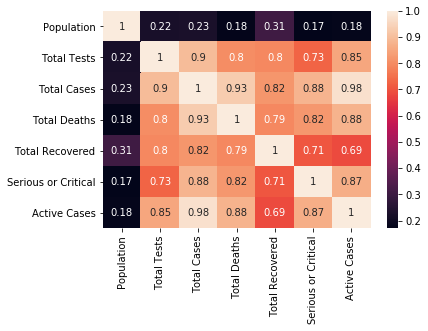

In [29]:
sns.heatmap(df.corr(),annot=True)    # features positively correlated

In [30]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,Saturday,USA,330774664,3722145.0,738792.0,39014.0,68269.000000,13551.0,631509.0
1,Saturday,Russia,145927292,1831892.0,36793.0,313.0,3057.000000,8.0,33423.0
2,Saturday,Spain,46752703,930230.0,194416.0,20043.0,74797.000000,7371.0,99576.0
3,Saturday,Brazil,212380932,62985.0,36722.0,2361.0,14026.000000,6634.0,20335.0
4,Saturday,UK,67844241,460437.0,114217.0,15464.0,5855.424185,1559.0,98409.0


In [31]:
import matplotlib.pyplot as plt

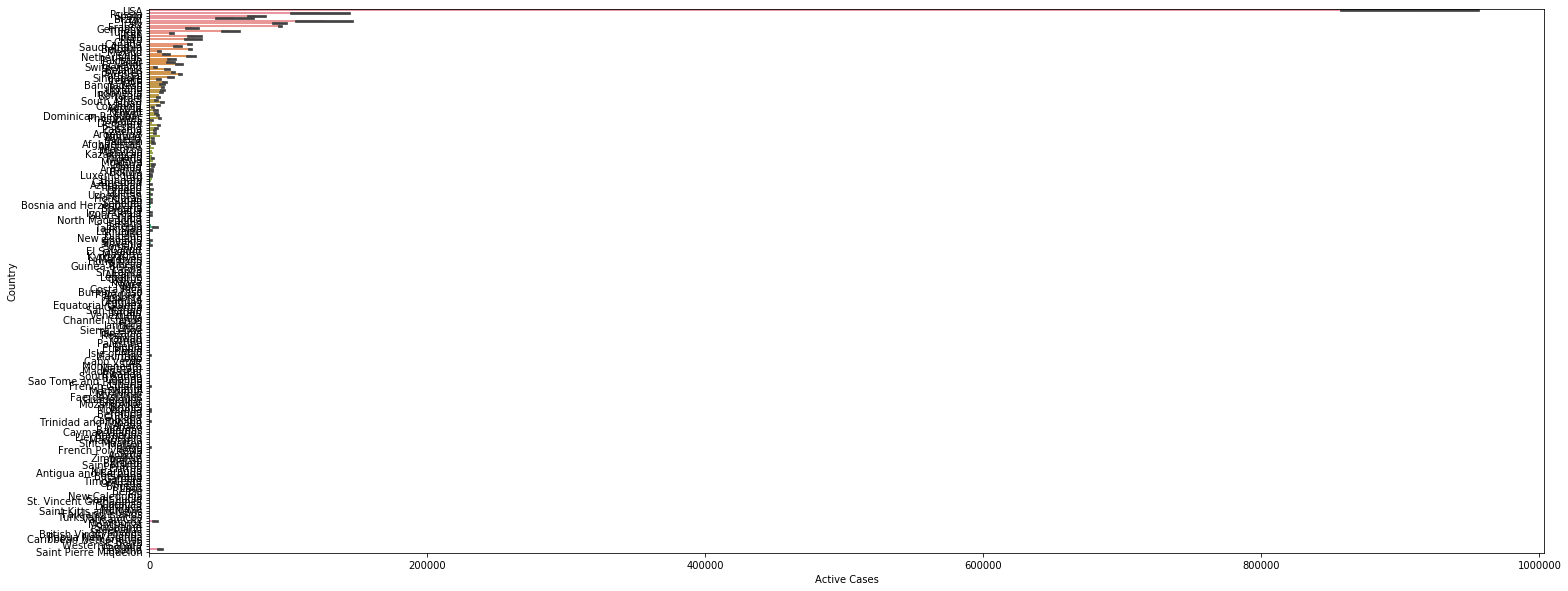

Active Cases  Country         
0.0           Greenland           31
              St. Barth           28
              Anguilla            22
              Falkland Islands    18
              Suriname            16
                                  ..
1052654.0     USA                  1
1068027.0     USA                  1
1078428.0     USA                  1
1090297.0     USA                  1
1101930.0     USA                  1
Name: Country, Length: 4515, dtype: int64


In [32]:
plt.figure(figsize=(25,10))
sns.barplot(x='Active Cases',y='Country',data=df)
plt.show()
print(df.groupby('Active Cases')['Country'].value_counts())

In [33]:
from sklearn.preprocessing import LabelEncoder       # converting string data to numerical
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Date']=le.fit_transform(df['Date'])

In [34]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2,201,330774664,3722145.0,738792.0,39014.0,68269.000000,13551.0,631509.0
1,2,158,145927292,1831892.0,36793.0,313.0,3057.000000,8.0,33423.0
2,2,180,46752703,930230.0,194416.0,20043.0,74797.000000,7371.0,99576.0
3,2,26,212380932,62985.0,36722.0,2361.0,14026.000000,6634.0,20335.0
4,2,200,67844241,460437.0,114217.0,15464.0,5855.424185,1559.0,98409.0


Univariate Analysis

In [35]:
import matplotlib.pyplot as plt

11.0        139
18.0        114
16.0        105
6.0          95
15.0         65
           ... 
28063.0       1
171253.0      1
11929.0       1
11178.0       1
2144.0        1
Name: Total Cases, Length: 3258, dtype: int64


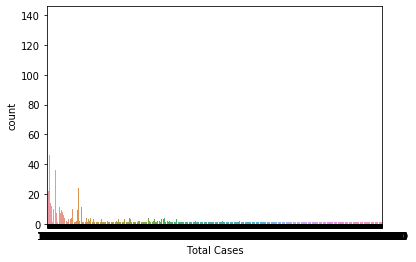

In [36]:
#plt.figure(figsize=(10,5))            # countplot for tatal cases 139 is maximum count
sns.countplot(x='Total Cases',data=df)
print(df['Total Cases'].value_counts())

16687100    31
26461313    31
84980       31
16364523    31
33409960    31
            ..
7121943     31
4262847     31
20829100    31
4992        31
20174887    31
Name: Population, Length: 213, dtype: int64


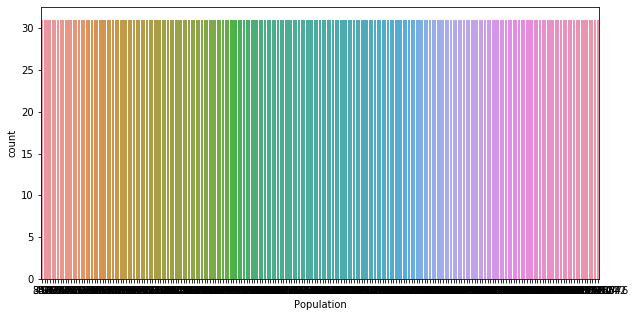

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Population',data=df)
print(df['Population'].value_counts())

0.0        244
1.0        185
2.0        125
6.0        111
3.0        110
          ... 
12222.0      1
93806.0      1
47096.0      1
10955.0      1
1856.0       1
Name: Active Cases, Length: 2681, dtype: int64


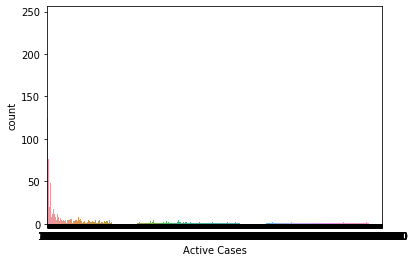

In [38]:
#plt.figure(figsize=(10,5))            # 244 is max count for active cases
sns.countplot(x='Active Cases',data=df)
print(df['Active Cases'].value_counts())

Bivariate Analysis

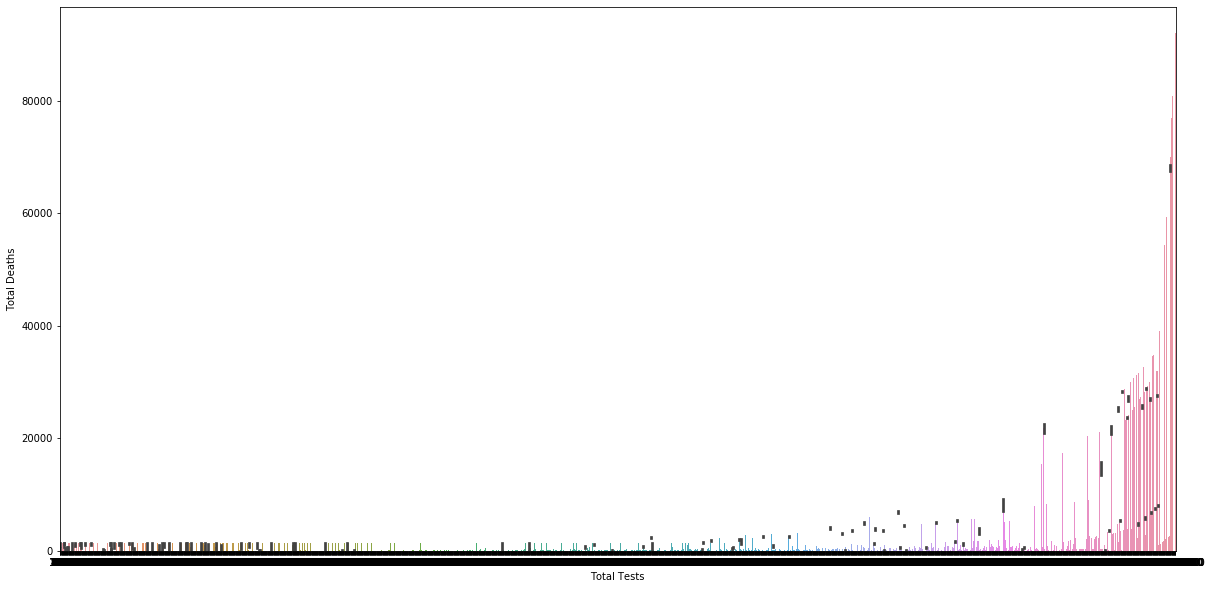

Total Tests  Total Deaths
10.0         1416.252096      1
19.0         1416.252096     13
             1.000000         3
36.0         1.000000        24
             1416.252096      7
                             ..
10638893.0   86912.000000     1
11090900.0   88507.000000     1
11875580.0   90978.000000     1
11949625.0   90113.000000     1
12300744.0   91981.000000     1
Name: Total Deaths, Length: 4029, dtype: int64


In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x='Total Tests',y='Total Deaths',data=df)
plt.show()
print(df.groupby('Total Tests')['Total Deaths'].value_counts())

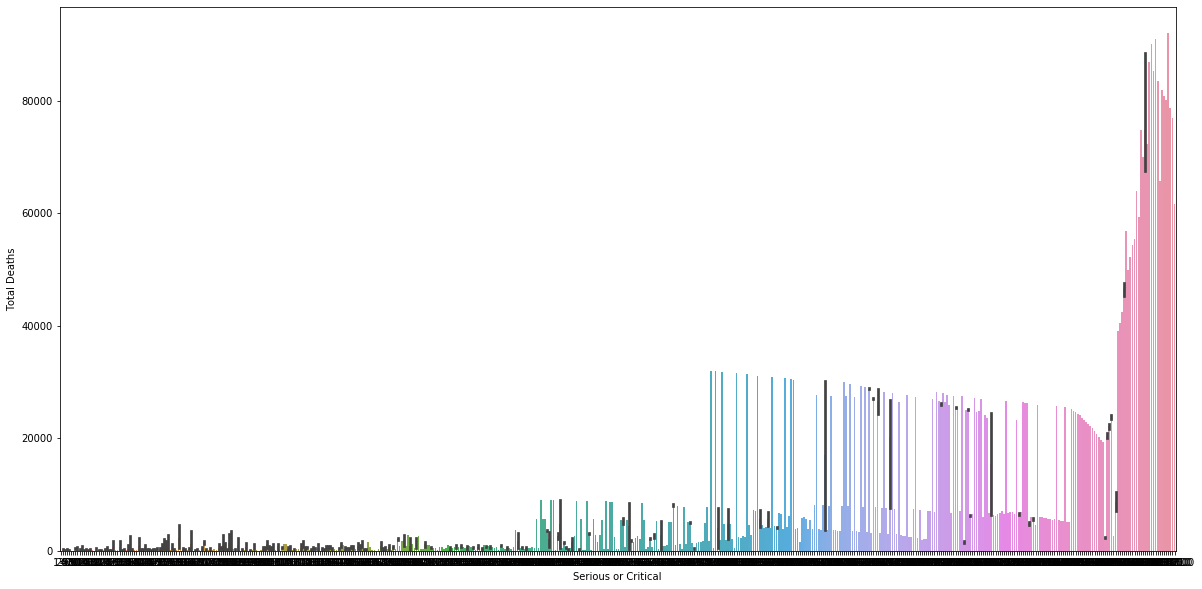

Serious or Critical  Total Deaths
1.0                  1416.252096     141
                     3.000000        103
                     4.000000         51
                     9.000000         37
                     11.000000        26
                                    ... 
16816.0              80037.000000      1
16868.0              91981.000000      1
16978.0              78615.000000      1
16995.0              76928.000000      1
18671.0              61656.000000      1
Name: Total Deaths, Length: 2517, dtype: int64


In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x='Serious or Critical',y='Total Deaths',data=df)
plt.show()
print(df.groupby('Serious or Critical')['Total Deaths'].value_counts())

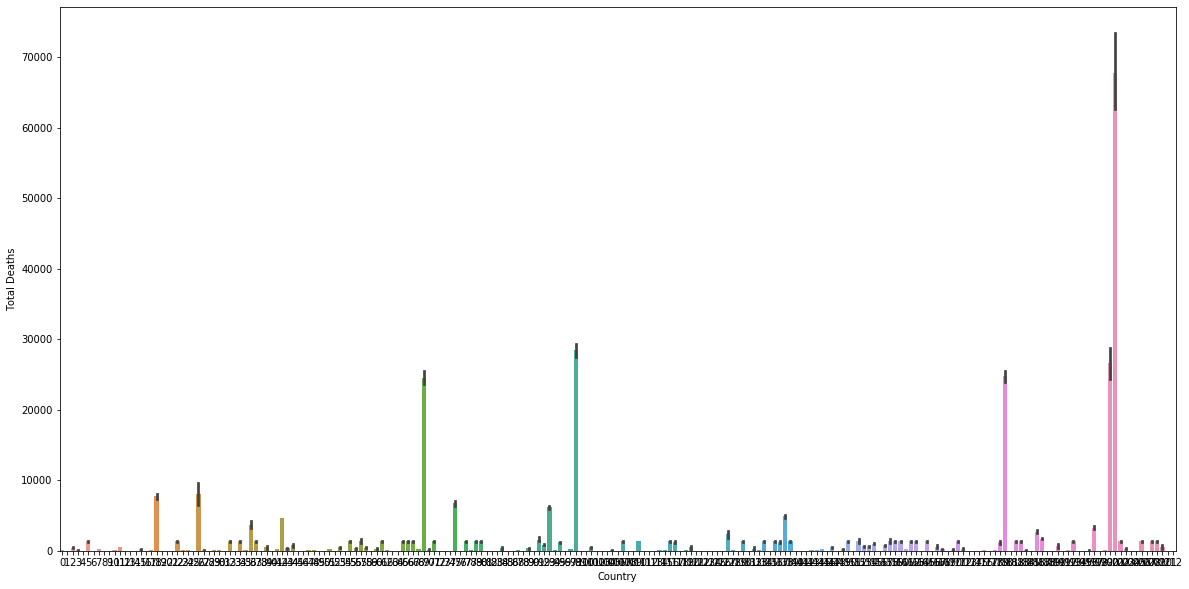

Country  Total Deaths
0        36.0             2
         30.0             1
         33.0             1
         40.0             1
         42.0             1
                         ..
211      7.0             10
         4.0              3
         2.0              1
212      4.0             27
         3.0              4
Name: Total Deaths, Length: 2788, dtype: int64


In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x='Country',y='Total Deaths',data=df)
plt.show()
print(df.groupby('Country')['Total Deaths'].value_counts())

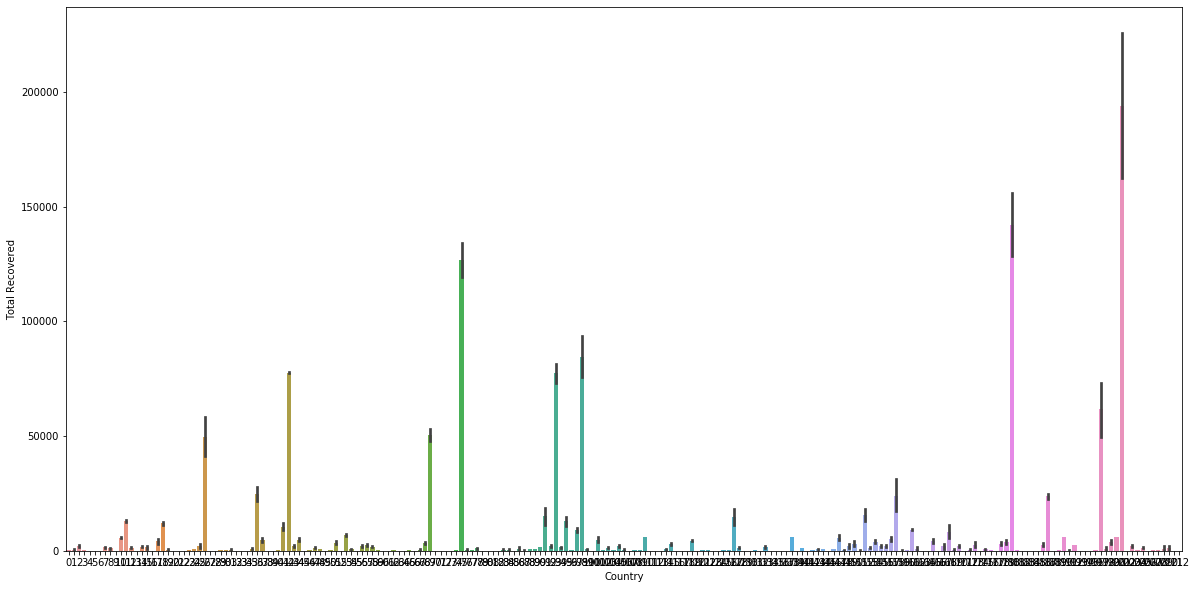

Country  Total Recovered
0        188.0              2
         345.0              2
         558.0              2
         745.0              2
         112.0              1
                           ..
212      9.0                5
         13.0               3
         12.0               1
         17.0               1
         18.0               1
Name: Total Recovered, Length: 3905, dtype: int64


In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='Country',y='Total Recovered',data=df)
plt.show()
print(df.groupby('Country')['Total Recovered'].value_counts())

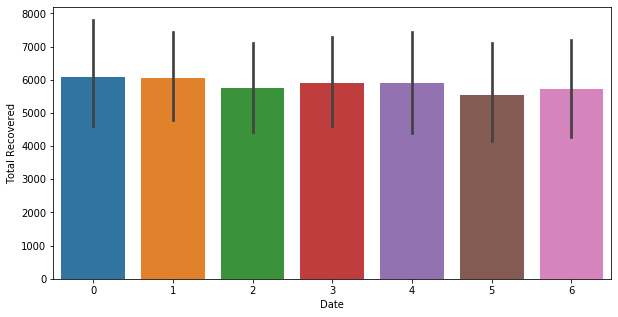

Date  Total Recovered
0     5855.424185        31
      8.000000           16
      6.000000           15
      10.000000          14
      13.000000          14
                         ..
6     148700.000000       1
      159359.000000       1
      183227.000000       1
      212981.000000       1
      310259.000000       1
Name: Total Recovered, Length: 3968, dtype: int64


In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Date',y='Total Recovered',data=df)
plt.show()
print(df.groupby('Date')['Total Recovered'].value_counts())

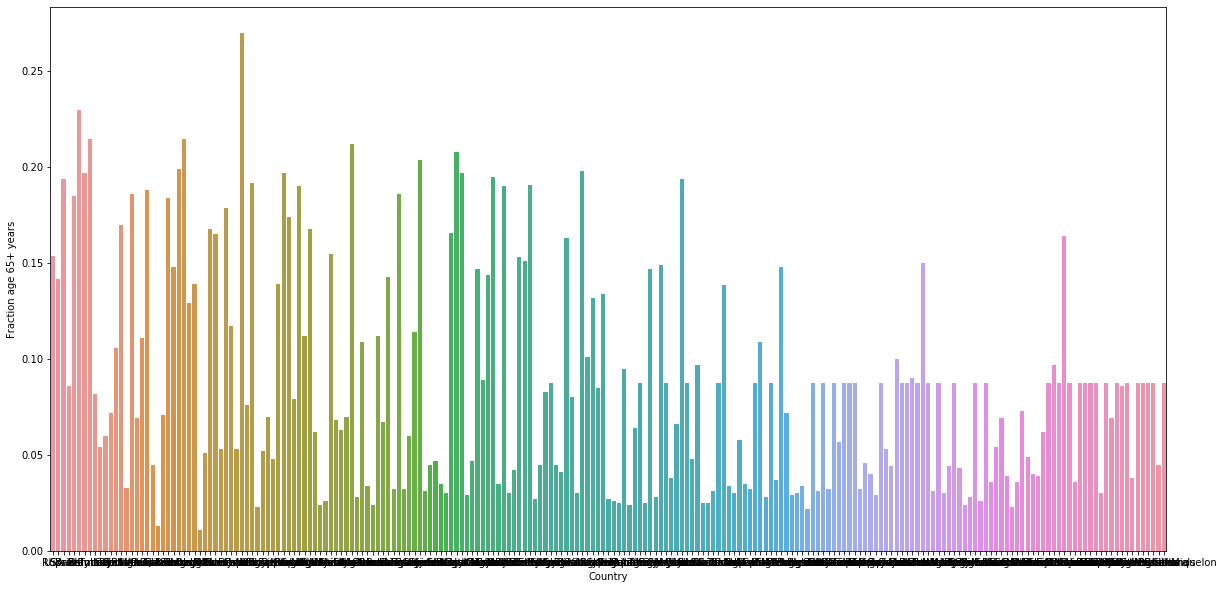

Country         Fraction age 65+ years
Afghanistan     0.026000                  1
Albania         0.132000                  1
Algeria         0.062000                  1
Andorra         0.087731                  1
Angola          0.024000                  1
                                         ..
Vietnam         0.072000                  1
Western Sahara  0.087731                  1
Yemen           0.029000                  1
Zambia          0.025000                  1
Zimbabwe        0.028000                  1
Name: Fraction age 65+ years, Length: 213, dtype: int64


In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x='Country',y='Fraction age 65+ years',data=df1)
plt.show()
print(df1.groupby('Country')['Fraction age 65+ years'].value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AE3D9AFF48>,
      dtype=object)

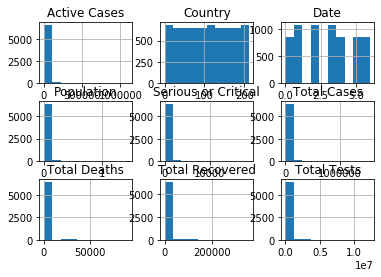

In [45]:
df.hist()           # hist graph of dataset

Removing Outliers

In [46]:
from scipy.stats import zscore
import numpy as np

In [47]:
z=np.abs(zscore(df))            
z

array([[4.65504357e-01, 1.54503887e+00, 2.08579650e+00, ...,
        2.71909784e+00, 1.00538508e+01, 9.54572314e+00],
       [4.65504357e-01, 8.45705489e-01, 7.76150267e-01, ...,
        1.21915610e-01, 2.89259093e-01, 3.60282544e-01],
       [4.65504357e-01, 1.20350397e+00, 7.34969097e-02, ...,
        3.00349543e+00, 5.33403840e+00, 1.37626428e+00],
       ...,
       [9.80884181e-01, 1.64262028e+00, 2.57640465e-01, ...,
        2.54965586e-01, 4.34126653e-17, 1.53029891e-01],
       [9.80884181e-01, 6.50542684e-02, 2.42583053e-01, ...,
        0.00000000e+00, 4.34126653e-17, 1.53014533e-01],
       [9.80884181e-01, 9.59550459e-01, 2.57705576e-01, ...,
        2.55052718e-01, 4.34126653e-17, 1.53029891e-01]])

In [48]:
threshold=3               #Identifying outlirs
print(np.where(z>3))

(array([   0,    0,    0,    0,    0,    2,    2,    2,    3,    5,    6,
          7,   10,   12,   12,  213,  213,  213,  213,  213,  215,  215,
        215,  216,  218,  219,  219,  220,  223,  225,  225,  426,  426,
        426,  426,  426,  428,  428,  428,  429,  431,  432,  432,  433,
        436,  438,  438,  639,  639,  639,  639,  639,  639,  641,  641,
        641,  642,  644,  645,  645,  646,  649,  651,  651,  852,  852,
        852,  852,  852,  852,  854,  854,  854,  855,  857,  858,  858,
        859,  862,  864,  864, 1065, 1065, 1065, 1065, 1065, 1065, 1066,
       1067, 1067, 1067, 1068, 1070, 1071, 1071, 1072, 1075, 1077, 1077,
       1278, 1278, 1278, 1278, 1278, 1278, 1279, 1280, 1280, 1280, 1281,
       1282, 1283, 1284, 1284, 1285, 1288, 1290, 1290, 1491, 1491, 1491,
       1491, 1491, 1491, 1492, 1493, 1493, 1493, 1494, 1495, 1496, 1497,
       1497, 1498, 1501, 1503, 1503, 1704, 1704, 1704, 1704, 1704, 1704,
       1705, 1706, 1706, 1706, 1707, 1708, 1709, 1

In [49]:
df1=df[(z<3).all(axis=1)]   #Removing outliers
df1

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
1,2,158,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0
4,2,200,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0
8,2,197,84230075,5.989330e+05,82329.0,1890.000000,10453.000000,1894.00000,69986.0
9,2,93,83862642,3.301370e+05,80868.0,5031.000000,55987.000000,3513.00000,19850.0
11,2,152,32915899,1.358950e+05,14420.0,348.000000,6684.000000,117.00000,7388.0
...,...,...,...,...,...,...,...,...,...
6598,1,182,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6599,1,209,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6600,1,5,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0
6601,1,110,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0


In [50]:
df1.skew()            # Checking Skewness

Date                   0.109536
Country               -0.011884
Population             3.880217
Total Tests            3.860036
Total Cases            5.183936
Total Deaths           6.225914
Total Recovered        6.921157
Serious or Critical    4.274869
Active Cases           6.120409
dtype: float64

In [51]:
# Removing Skewness
df1['Population'] = np.sqrt(df1['Population'])
df1['Total Tests'] = np.sqrt(df1['Total Tests'])
df1['Total Cases'] = np.cbrt(df1['Total Cases'])
df1['Total Deaths'] = np.cbrt(df1['Total Deaths'])
df1['Total Recovered'] = np.cbrt(df1['Total Recovered'])
df1['Serious or Critical'] = np.cbrt(df1['Serious or Critical'])
df1['Active Cases'] = np.cbrt(df1['Active Cases'])

In [52]:
# Separating x and y variables

In [53]:
x=df1.drop(['Total Deaths'],axis=1)
x

,Date,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
1,2,158,12080.036920,1353.474049,33.259961,14.513266,2.000000,32.211811
4,2,200,8236.761560,678.555083,48.518822,18.024067,11.595301,46.168412
8,2,197,9177.694427,773.907617,43.502840,21.864874,12.372572,41.210105
9,2,93,9157.654831,574.575495,43.243971,38.255663,15.201720,27.076145
11,2,152,5737.237924,368.639390,24.340066,18.837018,4.890973,19.476412
...,...,...,...,...,...,...,...,...
6598,1,182,99.368003,465.537497,1.817121,1.817121,7.285782,0.000000
6599,1,209,771.661843,465.537497,1.817121,1.817121,7.285782,0.000000
6600,1,5,122.421403,465.537497,1.442250,1.442250,7.285782,0.000000
6601,1,110,1462.954203,465.537497,1.000000,18.024067,7.285782,1.000000


In [54]:
y=df1['Total Deaths']

In [55]:
y

1        6.789661
4       24.913837
8       12.363856
9       17.135026
11       7.033850
          ...    
6598    11.230011
6599    11.230011
6600    11.230011
6601    11.230011
6602    11.230011
Name: Total Deaths, Length: 6272, dtype: float64

In [56]:
from sklearn.preprocessing import StandardScaler     # Scaling
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46637111,  0.85256751,  2.96332351, ...,  1.00962707,
        -0.9742006 ,  3.04404565],
       [-0.46637111,  1.5357502 ,  1.68419967, ...,  1.551183  ,
         2.56105123,  4.8406046 ],
       [-0.46637111,  1.48695144,  1.99736215, ...,  2.14364382,
         2.84742554,  4.20234814],
       ...,
       [-0.98180363, -1.63616943, -1.01642544, ..., -1.00663251,
         0.97327027, -1.10240923],
       [-0.98180363,  0.0717873 , -0.57026759, ...,  1.551183  ,
         0.97327027, -0.97368456],
       [-0.98180363,  0.96643129, -1.03182953, ..., -1.07485138,
         0.97327027, -1.10240923]])

Building Models

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [58]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor()

In [59]:
models = []
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('KNeighborsRegressor',knn))

In [60]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)


In [61]:
Model = []
score = []

for name,model in models:
    print("**********",name,'**************')
    print('\n')
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    r2_scr=r2_score(y_test,pre)
    print("r2_score corresponding to random state is" ,r2_scr)
    print("Absolute error is", np.abs(mean_squared_error(y_test,pre)))   
    print('\n')
    print("RMSE is", np.sqrt(mean_squared_error(y_test,pre)))

********** LinearRegression **************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
r2_score corresponding to random state is 0.3047639856529879
Absolute error is 13.891414906129691


RMSE is 3.727118847867571
********** DecisionTreeRegressor **************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
r2_score corresponding to random state is 0.8630023159389726
Absolute error is 2.737331828613693


RMSE is 1.6544883887817687
********** RandomForestRegressor **************


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
list=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
for i in list:
    print("Mean r2 score for",i, "regression",cross_val_score(i,x_train,y_train,cv=5,scoring="r2").mean())
    print("Standard Deviation for", i, "regression",cross_val_score(i,x_train,y_train,cv=5,scoring="r2").std())

Mean r2 score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) regression 0.21953076017864825
Standard Deviation for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) regression 0.022618338528500006
Mean r2 score for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') regression 0.8401337281092258
Standard Deviation for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_spli

In [64]:
from sklearn.externals import joblib            # Saving model
joblib.dump(rfr,'rfrcovid_world_wide.obj')

['rfrcovid_world_wide.obj']

Conclusion: Predicting deaths cases world_wide impacting features are Total Cases, Total Tests, Serious or Critical, Active                 Cases, Country impacting more. I have build all regressor models, cross-validation technique.
            RandomForestRegressor performing better with 92% accuracy so, I have saved model as rfr.